In [1]:
from measure_disparity import measure_disparity

import matplotlib.pyplot as plt
import numpy as np

from datasets.data_preproc_functions import load_preproc_data_adult
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


np.random.seed(1)

In [2]:
print("The test of measure_disparity starts now!")
privileged_groups = [{"sex": 1}]
unprivileged_groups = [{"sex": 0}]
dataset_orig = load_preproc_data_adult(["sex"])

The test of measure_disparity starts now!


In [3]:
dataset = dataset_orig
model = make_pipeline(StandardScaler(),
                      LogisticRegression(solver='liblinear', random_state=1))
fit_params = {'logisticregression__sample_weight': dataset.instance_weights}

lr_orig_panel19 = model.fit(dataset.features, dataset.labels.ravel(), **fit_params)
y_val_pred_prob = model.predict_proba(dataset.features)
pos_ind = np.where(model.classes_ == dataset.favorable_label)[0][0]
y_val_pred = (y_val_pred_prob[:, pos_ind] > 0.5).astype(np.float64)

str_y_val_pred_prob = []
for i in y_val_pred_prob:
    str_y_val_pred_prob.append(str(i.tolist()))
import pandas as pd
data_dic = {"Model prediction":str_y_val_pred_prob,"Binary outcome":dataset.labels.ravel(),"Model label":y_val_pred,"Sample weights":dataset.instance_weights,"Demographic data on protected and reference classes":dataset.protected_attributes.ravel()}

dataframe = pd.DataFrame(data_dic)

This dataset's SPD is 0.21295558958652375
This dataset's AOD is 0.28195175008357287
This dataset's EOD is 0.45775357935067557


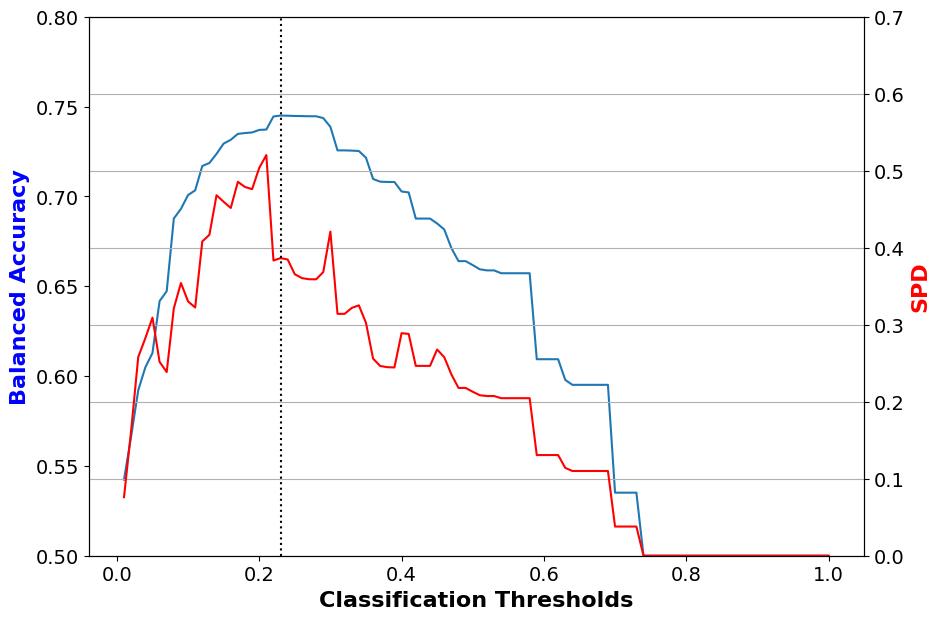

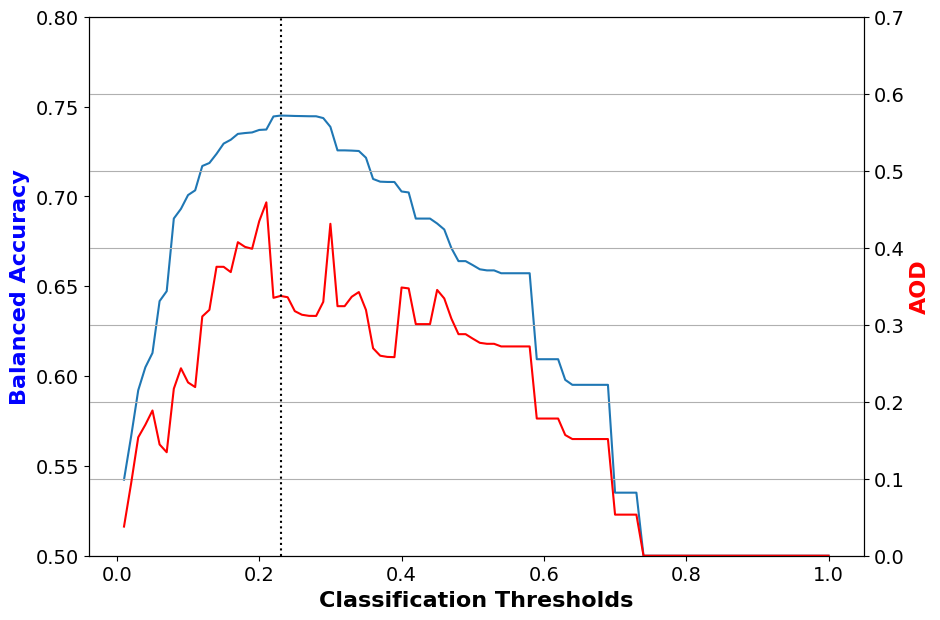

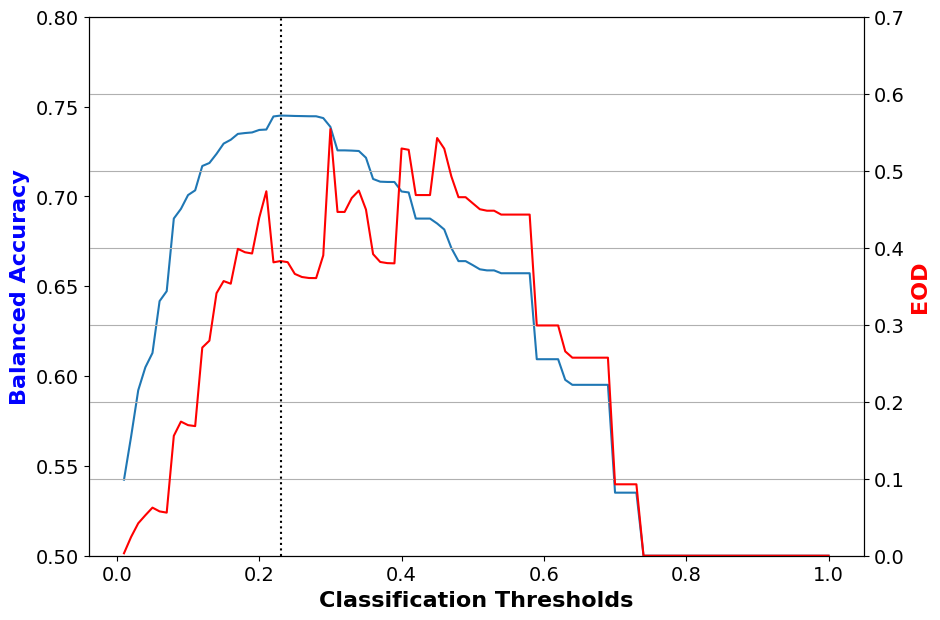

In [4]:
measure_disparity(dataframe)

In [5]:
print("The test of measure_disparity ends now!")

The test of measure_disparity ends now!


In [6]:
from datasets.adult_dataset import AdultDataset
from mitigate_disparity import MultiLevelReweighing as Reweighing, BiasRemoverModel
from datasets.disparate_impact import DisparateImpact

print("The test of mitigate_disparity starts now!")

dataset = AdultDataset()

multi_privileged_groups = [
    {"feature_name": "race", "privileged_value": 1, "level": 1},
    {"feature_name": "sex", "privileged_value": 1, "level": 1},
]
multi_unprivileged_groups = [
    {"feature_name": "race", "unprivileged_value": 0, "level": 1},
    {"feature_name": "sex", "unprivileged_value": 0, "level": 1},
]
privileged_groups1 = [{"sex": 1}]
unprivileged_groups1 = [{"sex": 0}]
privileged_groups2 = [{"race": 1}]
unprivileged_groups2 = [{"race": 0}]

rw = Reweighing(multi_unprivileged_groups, multi_privileged_groups)
trans_adult_dataset = rw.fit(dataset).transform(dataset)
print(
    "before reweighing ,sex disparate impact is "
    + str(DisparateImpact(dataset, "sex", 1, 1))
)

print(
    "after reweighing ,sex disparate impact is "
    + str(DisparateImpact(trans_adult_dataset, "sex", 1, 1))
)

print(
    "before reweighing ,race disparate impact is "
    + str(DisparateImpact(dataset, "race", 1, 1))
)

print(
    "after reweighing ,race disparate impact is "
    + str(DisparateImpact(trans_adult_dataset, "race", 1, 1))
)
brm_model = BiasRemoverModel()
brm_model.fit(dataset)
predic_prob = brm_model.predic_prob(dataset.features)
print("the probability of prediction is")
print(predic_prob)
print("The test of mitigate_disparity ends now!")

The test of mitigate_disparity starts now!


before reweighing ,sex disparate impact is 0.3634695423643793
after reweighing ,sex disparate impact is 0.8391395738403453
before reweighing ,race disparate impact is 0.6037688467181627
after reweighing ,race disparate impact is 0.7624820349744064
the probability of prediction is
[[0.99585456 0.00414544]
 [0.91340885 0.08659115]
 [0.70244156 0.29755844]
 ...
 [0.94678897 0.05321103]
 [0.99736969 0.00263031]
 [0.00270928 0.99729072]]
The test of mitigate_disparity ends now!
